In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
# from matplotlib.colors import LogNorm
import matplotlib.colors as colors

#### Remarquer les polarisations parallèles et perpendiculaire

In [288]:
maindir = '/homedata/nmpnguyen/OPAR/Processed/'
listfiles = sorted(Path(maindir, 'RF/LIO3T/').glob('2019-01-15RF_v3.nc'))
loaded = xr.open_dataset(listfiles[0])


In [289]:

p00532 = loaded.isel(channel = 0, time=0)['calibrated']
s00532 = loaded.isel(channel = 1, time=0)['calibrated']
dep = (p00532-s00532)/p00532
dep2 = s00532/(p00532+s00532)

Text(0.5, 0.98, 'OPAR LI3OT\n2019-01-15T16:28:59.000000000')

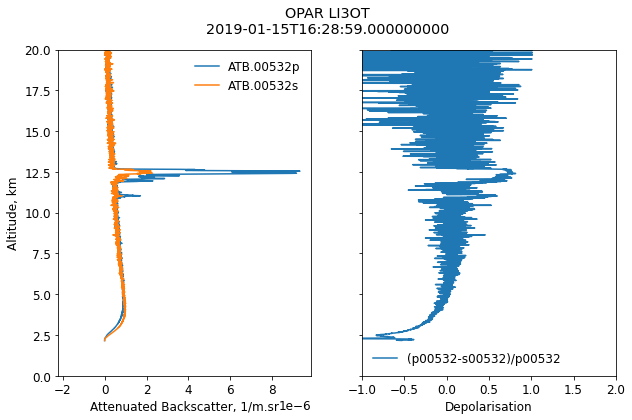

In [293]:

# PLOT 
f, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=[10,6])
ax2.plot(dep, loaded['range'].values+2.160, label ='(p00532-s00532)/p00532')
# ax2.plot(dep2, loaded['range'].values+2.160, label ='s00532/(p00532+s00532)')
ax.plot(p00532, loaded['range'].values+2.160, label ='ATB.00532p')
ax.plot(s00532, loaded['range'].values+2.160, label ='ATB.00532s')
ax.set(ylabel='Altitude, km', xlabel='Attenuated Backscatter, 1/m.sr')
ax2.set(xlabel='Depolarisation')
ax.legend(loc='best', frameon=False)
ax2.legend(loc='best', frameon=False)
ax.set_ylim(0, 20)
ax2.set_xlim(-1.0, 2.0)
plt.suptitle('OPAR LI3OT'+ '\n' +str(loaded['time'][0].values))



In [53]:
maindir = '/homedata/nmpnguyen/OPAR/Processed/'
listfiles = sorted(Path(maindir, 'RF/LIO3T/').glob('2019-01-15RF_v6.nc')) #calibrer p par betamol*0.97, s par betamol*0.03
loaded = xr.open_dataset(listfiles[0])
p00532 = loaded.sel(channel = '00532.p')['calibrated'].mean('time')
s00532 = loaded.sel(channel = '00532.s')['calibrated'].mean('time')
mol = loaded.isel(channel = 1, time=0)['simulated']
dep = (s00532-p00532)/p00532
print(loaded)
listfiles2 = sorted(Path(maindir, 'RF/LIO3T/').glob('2019-01-15RF_v3.nc')) #calibrer p par betamol, s par betamol*0.97
loaded = xr.open_dataset(listfiles2[0])
p00532 = loaded.sel(channel = '00532.p')['calibrated'].mean('time')
s00532 = loaded.sel(channel = '00532.s')['calibrated'].mean('time')
dep2 = s00532/p00532
mol2 = loaded.isel(channel = 1, time=0)['simulated']

<xarray.Dataset>
Dimensions:     (channel: 2, range: 16380, time: 132)
Coordinates:
  * time        (time) datetime64[ns] 2019-01-15T16:28:59 ... 2019-01-15T20:5...
  * range       (range) float64 0.0 0.0075 0.015 0.0225 ... 122.8 122.8 122.8
  * channel     (channel) object '00532.p' '00532.s'
Data variables:
    calibrated  (channel, time, range) float64 ...
    simulated   (channel, time, range) float64 ...
Attributes:
    calibration height:  [5000 7000]
    polarization:        ['para', 'total']


Text(0.5, 0.98, 'OPAR LI3OT 2019-01-15RF_v6 daily averaging')

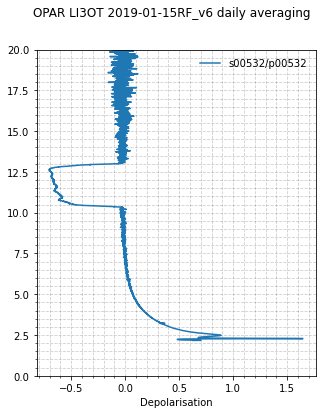

In [54]:
# PLOT 
limiteZ = (loaded['range'].values+2.160<20)
f, ax2 = plt.subplots(ncols=1, sharey=True, figsize=[5,6])
ax2.plot(dep.isel(range=limiteZ), loaded['range'].values[limiteZ]+2.160, label ='s00532/p00532')
# ax2.plot(dep2.isel(range=limiteZ), loaded['range'].values[limiteZ]+2.160, label ='s00532/p00532')
ax2.set(xlabel='Depolarisation')
ax2.legend(loc='best', frameon=False)
# ax2.set_xlim(-2, -0.5)
ax2.set_ylim(0,20)
ax2.grid(axis="both")
plt.minorticks_on()
ax2.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax2.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

# plt.suptitle('OPAR LI3OT'+ '\n' +str(loaded['time'][0].values))
plt.suptitle(f'OPAR LI3OT {listfiles[0].stem} daily averaging')

[Text(0, 0.5, 'Altitude (km)'),
 Text(0.5, 1.0, '/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-15RF_v3.nc\n 00532.p')]

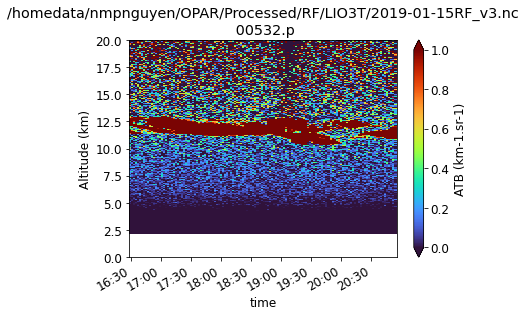

In [318]:
import matplotlib.dates as mdates

loaded['range'] = loaded['range']+2.160
p00532 = loaded.isel(channel = 0)['calibrated']
s00532 = loaded.isel(channel = 1)['calibrated']
# loaded['range'] = loaded['range']+2.160 # transfert to Altitude (km)
f, ax = plt.subplots()
plt.rcParams['font.size'] = '12'

((p00532-s00532)/s00532).plot(x='time', y='range', ax=ax, shading='auto',robust=True, cmap = 'turbo',
                                            vmin=0, vmax=1, #norm=colors.LogNorm(vmin=0, vmax=1),
                                            cbar_kwargs={'label':'ATB (km-1.sr-1)'})


ax.set_ylim(0, 20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(ylabel='Altitude (km)',
       title=f'{listfiles[0]}\n {loaded.isel(channel=0)["channel"].values}')


# cbar = fig.colorbar(im, ax=ax,norm=colors.SymLogNorm(linthresh=1e-3, vmin=0, linscale=0.01))
# cbar.locator = locator
# cbar.formatter = formatter
# cbar.update_normal(im)

[Text(0, 0.5, 'Altitude (km)'),
 Text(0.5, 1.0, '/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-15RF_v1.nc\n 00532.p')]

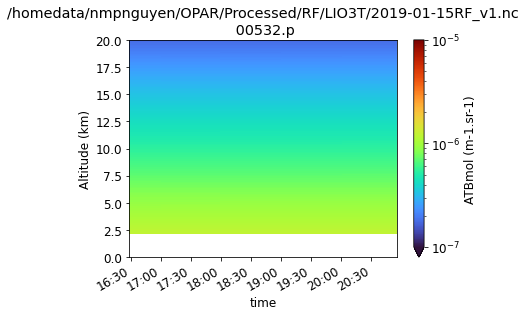

In [189]:
f, ax = plt.subplots()
plt.rcParams['font.size'] = '12'
# locator = [1.2e-6, 1e-6, 0.8e-6, 0.6e-6, 0.4e-6, 0.2e-6, 0.0]
formatter = LogFormatter()
(loaded.isel(channel=0)['simulated']).plot(x='time', y='range', ax=ax, shading='auto',robust=True, cmap = 'turbo',
                                            norm=colors.LogNorm(vmin=1e-7, vmax=1e-5),
                                            cbar_kwargs={'label':'ATBmol (m-1.sr-1)'})


ax.set_ylim(0, 20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(ylabel='Altitude (km)',
       title=f'{listfiles[0]}\n {loaded.isel(channel=0)["channel"].values}')

(0.0001, 0.01)

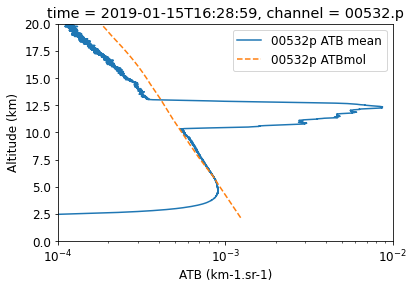

In [194]:
p00532_mean_calib = loaded.isel(channel=0)['calibrated'].mean('time')
p00532_mean_simul = loaded.isel(channel=0)['simulated'].mean('time')

fig, ax = plt.subplots()
(p00532_mean_calib*1e3).plot(y='range', ax=ax, label='00532p ATB mean', xscale='log')
(loaded.isel(channel=0, time=0)['simulated']*1e3).plot(y='range', ax=ax, label='00532p ATBmol', linestyle='--', xscale='log')
# p00532_mean_simul.plot(y='range', ax=ax, label='00532p ATBmol mean', xscale='log')
ax.legend()
ax.set(ylabel= 'Altitude (km)', xlabel='ATB (km-1.sr-1)')
ax.set_ylim(0,20)
ax.set_xlim(1e-4, 1e-2)

In [263]:
#voir le rapport 00532p/00532s en RAW
maindir = '/homedata/noel/OPAR/'
listfiles = sorted(Path(maindir, 'LIO3T.daily/').glob('2019-01-15*'))
loaded = xr.open_dataset(listfiles[0])


In [264]:
limiteZ = (loaded['range']<20)
p00532 = loaded.sel(channel = '00532.p').isel(range=limiteZ)['signal']
s00532 = loaded.sel(channel = '00532.s').isel(range=limiteZ)['signal']

p00532['range'] = p00532['range']+2.160 # transfert to Altitude (km)
s00532['range'] = s00532['range']+2.160


[Text(0.5, 1.0, '/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-15RF_v1.nc'),
 Text(0, 0.5, 'Altitude (km)')]

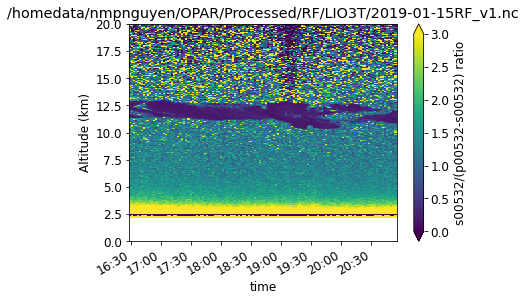

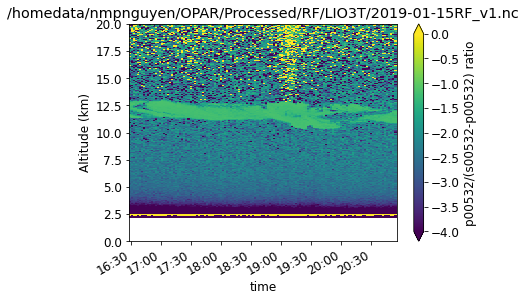

In [216]:
fig, ax = plt.subplots()
plt.rcParams['font.size'] = '12'
# plt.rcParams['axes.labelsize'] = '12'

((p00532-s00532)/s00532).plot(x='time', y='range', robust=True, cmap='viridis', ax=ax, vmin=0, vmax=3,
                     cbar_kwargs={'label':'s00532/(p00532-s00532) ratio'})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim(0, 20)
ax.set(title=f'{listfiles[0]}', ylabel='Altitude (km)')
# plt.clf()

# fig,ax= plt.subplots()
# plt.rcParams['font.size'] = '12'
# ((p00532-s00532)/p00532).plot(x='time', y='range', robust=True, cmap='viridis', ax=ax, 
#                      cbar_kwargs={'label':'p00532-s00532)/p00532 ratio'})
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.set_ylim(0, 20)
# ax.set(title=f'{listfiles[0]}', ylabel='Altitude (km)')


fig,ax= plt.subplots()
plt.rcParams['font.size'] = '12'
(p00532/(s00532-p00532)).plot(x='time', y='range', robust=True, cmap='viridis', ax=ax, vmin=-4, vmax=0,
                     cbar_kwargs={'label':'p00532/(s00532-p00532) ratio'})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim(0, 20)
ax.set(title=f'{listfiles[0]}', ylabel='Altitude (km)')

[Text(0, 0.5, 'Altitude, km'),
 Text(0.5, 0, 'Ratio'),
 Text(0.5, 1.0, 'time = 2019-01-15T16:28:59.000000000')]

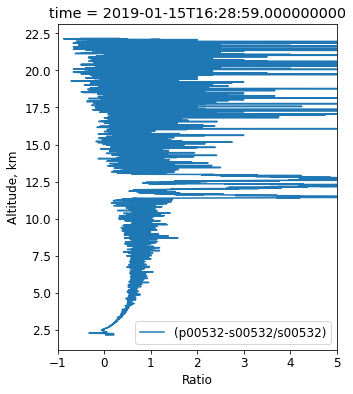

In [285]:
selectedtime = 2#np.array('2019-01-15T16:30:00', dtype='datetime64[ns]')
# p00532['time'] = p00532.time.dt.round('Min') 
# s00532['time'] = s00532.time.dt.round('Min') 

fig, ax = plt.subplots(figsize=(5,6))
# (p00532.sel(time=selectedtime)*np.square(p00532['range']-2.160)).plot(y='range', xscale='log', ax=ax, label='00532.p')
# (s00532.sel(time=selectedtime)*np.square(s00532['range']-2.160)).plot(y='range', xscale='log', ax=ax, label='00532.s')

((p00532-s00532)/s00532).isel(time=selectedtime).plot(y='range', xscale='linear', ax=ax, label='(p00532-s00532/s00532)')
ax.legend(loc='best')
ax.set_xlim(-1,5)
ax.set(ylabel='Altitude, km', xlabel='Ratio', title = f'time = {loaded.time[0].values}')

(-1.0, 5.0)

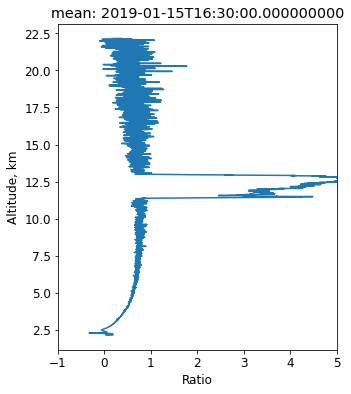

In [286]:
p00532mean = p00532.resample(time='30Min').mean('time')
s00532mean = s00532.resample(time='30Min').mean('time')

fig, ax=plt.subplots(figsize=(5,6))
((p00532mean-s00532mean)/s00532mean).isel(time=1).plot(y='range', ax=ax)
ax.set(title=f'mean: {p00532mean.time[1].values}', xlabel='Ratio', ylabel='Altitude, km')
ax.set_xlim(-1,5)

In [287]:
p00532mean.shape, p00532.shape

((10, 2667), (132, 2667))

#### Récupérer les fichiers --> Synthétiser les données 

In [53]:
maindir = Path('/homedata/nmpnguyen/OPAR/Processed/')
listfiles = sorted(Path(maindir, 'RF/LIO3T/').glob('*RF_v1.nc'))

dep_total = np.empty([1, 16380], dtype=np.float)
ta_total = np.empty([1, 16380], dtype=np.float)

for file in listfiles: 
    print(file)
    print(Path(maindir, 'LIO3T', file.name.split('RF_v1')[0]+'_simul.pkl'))
    loaded = xr.open_dataset(file) 
    simul = pd.read_pickle(Path(maindir, 'LIO3T', file.name.split('RF_v1')[0]+'_simul.pkl'))
    
    ta = simul['ta'].unstack().values
    ta_total = np.concatenate((ta_total, ta), axis=0)
    
    p00532 = loaded.sel(channel = '00532.p')['calibrated']
    s00532 = loaded.sel(channel = '00532.s')['calibrated']
    dep = (p00532/(p00532+s00532)).values
    dep_total = np.concatenate((dep_total, dep), axis=0)

/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-11RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-11_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-14RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-14_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-15RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-15_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-16RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-16_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-17RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-17_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-21RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-21_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-22RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-22_simul.pkl
/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-24RF_v1.nc
/homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-24_simul.pkl


#### Moyenner par tranche

In [180]:
m = 30 # 13:100m, 30:250m
binsDep = np.arange(0.0, 2.0, 0.05)
binsTa = np.arange(taN[:,(opaltN<20)].min(), taN[:,(opaltN<20)].max(), 5)


In [181]:
opalt = loaded['range'].values
opaltN = np.nanmean(opalt.reshape(-1, m), axis=1)

depN = np.nanmean(dep_total[1:,:].reshape(-1, int(len(opalt)/m), m), axis=2)
taN = np.nanmean(ta_total[1:,:].reshape(-1, int(len(opalt)/m), m), axis=2)

#### Densité de dépolarisation (532nm) par tranche d’altitude

In [183]:
counts = np.array([np.histogram(depN[:,i], bins=binsDep, density=False)[0] 
                   for i in range(len(opaltN))])
probabs = counts/(np.sum(counts, axis=1).reshape(-1,1)) #counts/depN.shape[0]
X2d, Y2d = np.meshgrid(np.linspace(0.0, 2.0, len(binsDep)-1), opaltN)
# DF = pd.DataFrame(np.stack((ta_total[:,(opalt<20000)].flatten(), dep_total[:,(opalt<20000)].flatten()), axis=-1),
#                  columns=["Temperature", "Depolarization"])


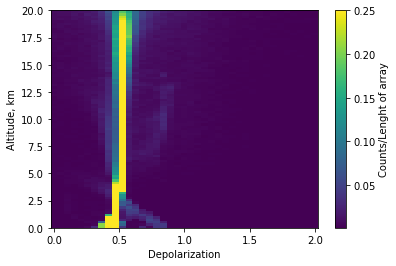

In [185]:
f, ax = plt.subplots()
c = ax.pcolor(X2d, Y2d, probabs, cmap='viridis', shading='nearest') #vmin=2, vmax=18, 
ax.set_ylim(0, 20)
# ax.set_xlim(0.0, 2.0) 
ax.set(xlabel='Depolarization', ylabel='Altitude, km')
plt.colorbar(c, ax=ax, label='Counts/Lenght of array')
c.set_clim(0.001, 0.25)

#### Densité de dépolarisation avec la température

In [174]:

DF = pd.DataFrame(np.stack((taN[:,(opaltN<20)].flatten(), depN[:,(opaltN<20)].flatten()), axis=-1),
                 columns=["Temperature", "Depolarization"])

H, xedges, yedges = np.histogram2d(DF['Depolarization'].values, DF['Temperature'].values, 
                                   density=False, bins = (binsDep, binsTa))

probas = H/(np.sum(H, axis=0).reshape(1,-1))
X2d, Y2d = np.meshgrid(np.linspace(0.0, 2.0, len(binsDep)-1), 
                       np.linspace(taN[:,(opaltN<20)].min(), taN[:,(opaltN<20)].max(),len(binsTa)-1))

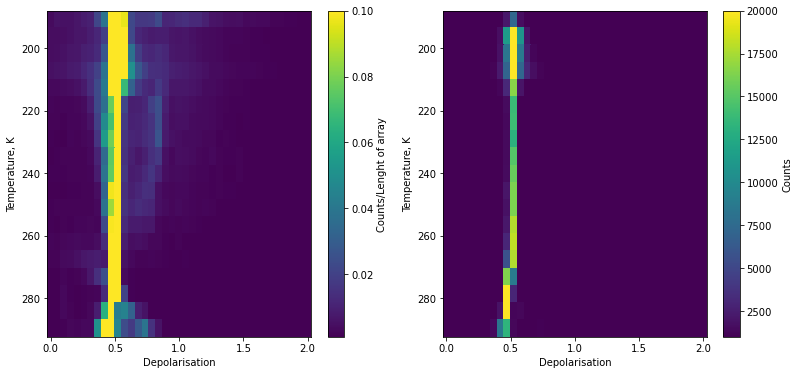

In [179]:
ff, (ax, ax2) = plt.subplots(ncols=2, figsize =[13,6])
c = ax.pcolormesh(X2d, Y2d, probas.T, cmap='viridis', shading='nearest')
plt.colorbar(c, ax=ax, label='Counts/Lenght of array')
ax.set(xlabel='Depolarisation', ylabel='Temperature, K')
c.set_clim(0.001, 0.1)
ax.invert_yaxis()

c2 = ax2.pcolormesh(X2d, Y2d, H.T, cmap='viridis', shading='nearest')
plt.colorbar(c2, ax=ax2, label='Counts')
ax2.set(xlabel='Depolarisation', ylabel='Temperature, K')
c2.set_clim(1e3, 2e4)
ax2.invert_yaxis()

In [170]:
probas[:,-1]


array([0.00446144, 0.00360794, 0.02060374, 0.03207629, 0.02568093,
       0.02762084, 0.02032136, 0.17472865, 0.32808399, 0.10202304,
       0.00434888, 0.01878025, 0.04248019, 0.10660487, 0.16228703,
       0.07302709, 0.0274175 , 0.00178526, 0.00181094, 0.00613497,
       0.00693937, 0.00430663, 0.00308166, 0.00119832, 0.0006993 ,
       0.00321027, 0.00397614, 0.00683371, 0.00705882, 0.00401606,
       0.00454545, 0.00491803, 0.0056926 , 0.00229358, 0.00230947,
       0.00777202, 0.00481928, 0.        , 0.00626959])

In [171]:
H[:,-1]

array([7.0000e+00, 6.0000e+00, 4.3000e+01, 7.4000e+01, 6.6000e+01,
       8.8000e+01, 8.6000e+01, 1.4810e+03, 8.5000e+03, 1.3349e+04,
       1.3240e+03, 6.7900e+02, 5.2000e+02, 8.2800e+02, 1.1240e+03,
       4.3400e+02, 1.6700e+02, 7.0000e+00, 5.0000e+00, 1.7000e+01,
       1.9000e+01, 1.0000e+01, 6.0000e+00, 2.0000e+00, 1.0000e+00,
       4.0000e+00, 4.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00,
       3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
       3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00])